<a href="https://colab.research.google.com/github/edco29/MLBankMarketing/blob/master/BankPrediction_Facundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Bank Marketing DataSet 

## ***Variable binaria de salida (objetivo deseado)***:
  **17 - y** - ¿el cliente subscribirá un depósito a plazo? (binario: "yes", "no")
   
## ***16 Variables* de entrada:**
## Datos del cliente bancario:
   **1 - age**: edad: (numérica)
   
   **2 - job**: trabajo: tipo de trabajo (*categórico*)
   
      (: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", 
				"student", "blue-collar", "self-employed", "retired", "technician", "services") 
      (: "admin.", "desconocido", "desempleado", "dirección", "criada", "empresario", 
				"estudiante", "obrero", "autónomo", "jubilado", "técnico", "servicios") 

   **3 - marital**: marital: estado civil, (*categórico*)
   
      (: "casado", "divorciado", "soltero";  **nota**: "divorciado" significa divorciado o viudo)

   **4 - education**: educación: (*categórica*: "desconocida", "secundaria", "primaria", "terciaria")

   **5 - default**: incumplimiento: ¿tiene el crédito en mora? (binario: "sí", "no")

   **6 - balance**: saldo: saldo medio anual, en euros (numérico) 

   **7 - housing**: vivienda: ¿tiene préstamo de vivienda? (binario: "sí", "no")

   **8 - loan**: préstamo: ¿tiene préstamo personal? (binario: "sí", "no")

## Relacionados con el último contacto de la actual campaña:
   **9 - contact**: contacto: tipo de comunicación del contacto (categórico: "desconocido", "teléfono", "celular") 

  **10 - day**: día: último día de contacto del mes (numérico)

  **11 - month**: mes: último mes de contacto del año (*categórico*: "jan", "feb", "mar", ..., "nov", "dec")

  **12 - duration**: duración: duración del último contacto, en segundos (numérico)

## Otros atributos:
  **13 - campaign**: campaña: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)

  **14 - pdays**: número de días que pasaron después de que el cliente fue contactado por última vez de una campaña anterior (numérico, -1 significa que el cliente no fue contactado previamente)

  **15 - previous**: anterior: número de contactos realizados antes de esta campaña y para este cliente (numérico)

  **16 - poutcome**: resultado de la anterior campaña de comercialización (categórico: "desconocido", "otro", "fracaso", "éxito")


In [0]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt


In [0]:
bank_df = pd.read_csv("bank/bank-full.csv", sep=";")
bank_df_test = pd.read_csv("bank/bank.csv", sep=";")
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [0]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [0]:
bank_df_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [0]:
print(bank_df.columns)
print(bank_df.dtypes)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [0]:
bank_df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [0]:
bank_df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

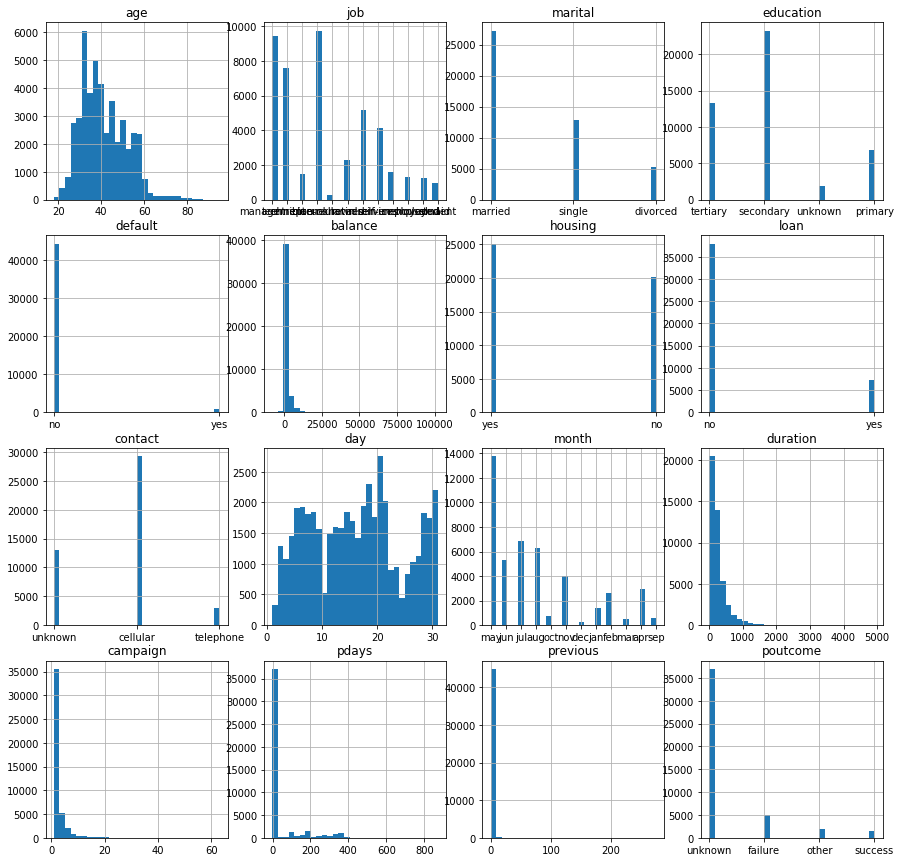

In [0]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15,15))
for idx, colname in enumerate(bank_df.columns):
  if colname != 'y':
    plt.subplot(4,4,idx+1)
    plt.title(colname)
    bank_df[colname].hist(bins=30)

In [0]:
#plt.figure( figsize=(15,15))
#bank_df.hist(bins=40)
#plt.show()

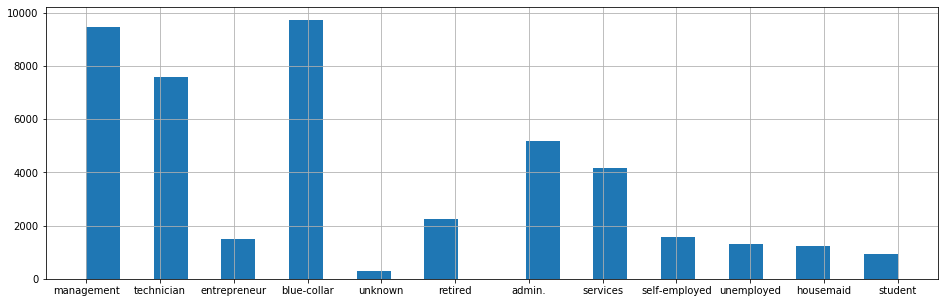

In [0]:
plt.figure( figsize=(16,5))
bank_df.job.hist(bins=24)

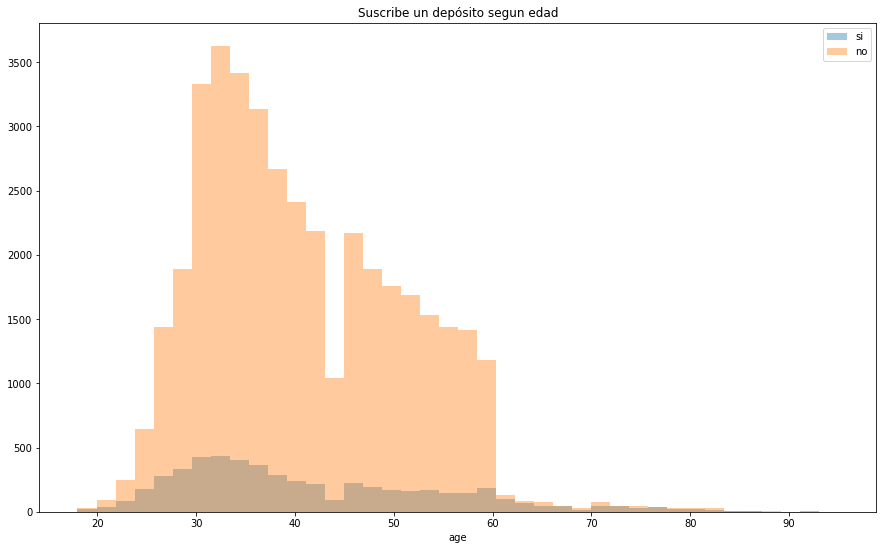

In [0]:
suscribe = 'si'
nosuscribe= 'no'
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(15, 9))
ax = sns.distplot(bank_df[bank_df['y']=='yes'].age, bins=40, label = suscribe, ax = axes, kde =False)
ax = sns.distplot(bank_df[bank_df['y']=='no'].age, bins=40, label = nosuscribe, ax = axes, kde =False)
ax.legend()
_=ax.set_title('Suscribe un depósito segun edad')

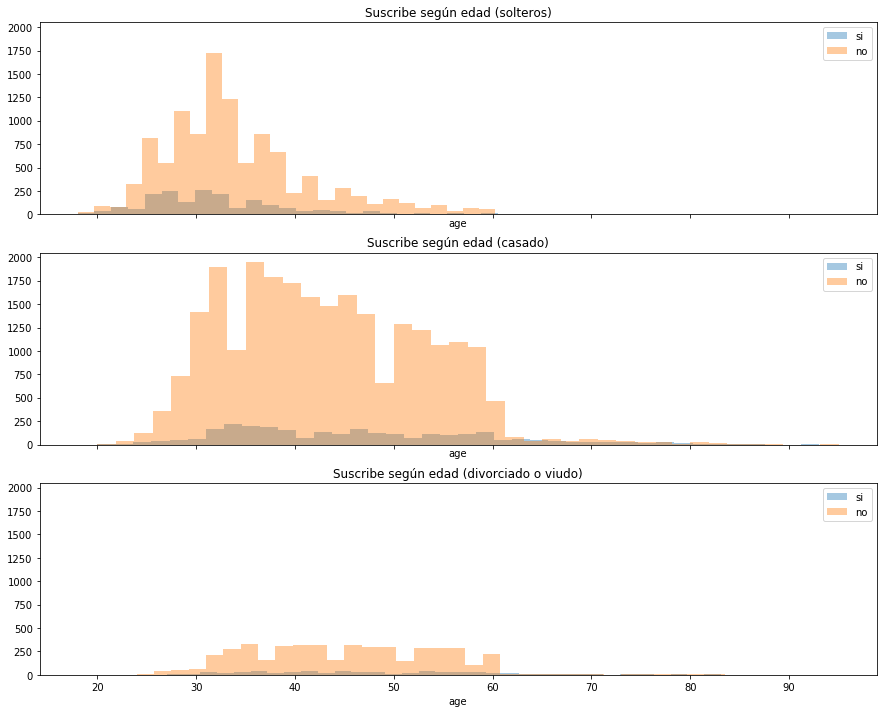

In [0]:
#suscribe separado por estado civil

numbins=40
suscribe = 'si'
nosuscribe= 'no'
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(15, 12),sharex=True , sharey=True)
soltero = bank_df[bank_df['marital']=='single']
casado = bank_df[bank_df['marital']=='married']
divorx = bank_df[bank_df['marital']=='divorced']
ax = sns.distplot(soltero[soltero['y']=='yes'].age, bins=numbins, label = suscribe, ax = axes[0], kde =False)
ax = sns.distplot(soltero[soltero['y']=='no'].age, bins=numbins, label = nosuscribe, ax = axes[0], kde =False)
ax.legend()
_=ax.set_title('Suscribe según edad (solteros)')
ax = sns.distplot(casado[casado['y']=='yes'].age, bins=numbins, label = suscribe, ax = axes[1], kde =False)
ax = sns.distplot(casado[casado['y']=='no'].age, bins=numbins, label = nosuscribe, ax = axes[1], kde =False)
ax.legend()
_=ax.set_title('Suscribe según edad (casado)')
ax = sns.distplot(divorx[divorx['y']=='yes'].age, bins=numbins, label = suscribe, ax = axes[2], kde =False)
ax = sns.distplot(divorx[divorx['y']=='no'].age, bins=numbins, label = nosuscribe, ax = axes[2], kde =False)
ax.legend()
_=ax.set_title('Suscribe según edad (divorciado o viudo)')

###Ahora vamos a convertir las variables categóricas a variables numéricas y lo vamos a guardar de la siguiente manera:
### *DataFrame categorico*   ---> *numérico*
### **bank_df**              ---> ***bank_numdf***
### **bank_df_test**         ---> ***bank_numdf_test***

In [0]:
bank_numdf = bank_df_test.copy()

for columna, serie in bank_numdf.items():
    if not pd.api.types.is_numeric_dtype(serie):
        # Transforma la variable a tipo category
        bank_numdf[columna] = serie.astype('category')
        
# Convertir cada columna categórica a numérica
for columna, serie in bank_numdf.items():
    if pd.api.types.is_categorical_dtype(serie):
        bank_numdf[columna] = serie.cat.codes+1

bank_numdf_test = bank_numdf.copy()

In [0]:
bank_numdf_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,11,2,1,1,1787,1,1,1,19,11,79,1,-1,0,4,1
1,33,8,2,2,1,4789,2,2,1,11,9,220,1,339,4,1,1
2,35,5,3,3,1,1350,2,1,1,16,1,185,1,330,1,1,1
3,30,5,2,3,1,1476,2,2,3,3,7,199,4,-1,0,4,1
4,59,2,2,2,1,0,2,1,3,5,9,226,1,-1,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,8,2,2,1,-333,2,1,1,30,6,329,5,-1,0,4,1
4517,57,7,2,3,2,-3313,2,2,3,9,9,153,1,-1,0,4,1
4518,57,10,2,2,1,295,1,1,1,19,2,151,11,-1,0,4,1
4519,28,2,2,2,1,1137,1,1,1,6,4,129,4,211,3,2,1


In [0]:
bank_numdf = bank_df.copy()

for columna, serie in bank_numdf.items():
    if not pd.api.types.is_numeric_dtype(serie):
        # Transforma la variable a tipo category
        bank_numdf[columna] = serie.astype('category')
        
# Convertir cada columna categórica a numérica
for columna, serie in bank_numdf.items():
    if pd.api.types.is_categorical_dtype(serie):
        bank_numdf[columna] = serie.cat.codes+1


In [0]:
bank_numdf

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,5,2,3,1,2143,2,1,3,5,9,261,1,-1,0,4,1
1,44,10,3,2,1,29,2,1,3,5,9,151,1,-1,0,4,1
2,33,3,2,2,1,2,2,2,3,5,9,76,1,-1,0,4,1
3,47,2,2,4,1,1506,2,1,3,5,9,92,1,-1,0,4,1
4,33,12,3,4,1,1,1,1,3,5,9,198,1,-1,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,10,2,3,1,825,1,1,1,17,10,977,3,-1,0,4,2
45207,71,6,1,1,1,1729,1,1,1,17,10,456,2,-1,0,4,2
45208,72,6,2,2,1,5715,1,1,1,17,10,1127,5,184,3,3,2
45209,57,2,2,2,1,668,1,1,2,17,10,508,4,-1,0,4,1


In [0]:
from pandas.plotting import scatter_matrix
# scatter plot matrix
#scatter_matrix(bank_numdf.drop(['default','housing','loan','balance','duration'], axis=1),figsize=(15,15))
plt.show()

In [0]:
#sns.pairplot(bank_numdf, hue="y")

In [0]:
plt.show()

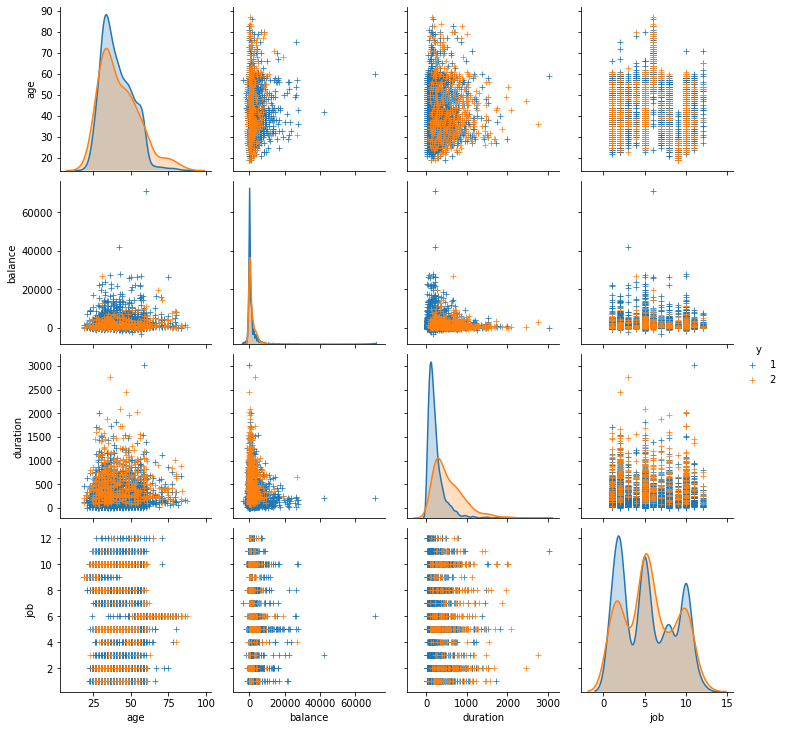

In [0]:
sns.pairplot(bank_numdf_test, vars=['age','balance','duration','job'], markers='+', hue="y")

#### **+1** : NO suscribe un deposito
#### **+2** : SI suscribe un depósito

In [0]:
#sns.pairplot(bank_numdf_test, vars=['age','month','duration','pdays'], markers='+', hue="y")

## Vamos a entrenar tres modelos

*   KNeighbors
*   SuppportVector
*   GaussianNB


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

### Preprocesamiento de la data

In [0]:
y_train = bank_numdf.y
X_train = bank_numdf.drop(labels=['y'], axis=1)

y_test = bank_numdf_test.y
X_test = bank_numdf_test.drop(labels=['y'], axis=1)

print("Shape (filas,colum) de la data:")
print("X_test {}".format(X_test.shape) )
print("y_test {}".format(y_test.shape) )
print("X_train {}".format(X_train.shape) )
print("y_train {}".format(y_train.shape) )

Shape (filas,colum) de la data:
X_test (4521, 16)
y_test (4521,)
X_train (45211, 16)
y_train (45211,)


## Random Oversampling

In [0]:
num_no_suscritos = y_train.value_counts()[1]
num_suscritos = y_train.value_counts()[2]

num_muestras = num_no_suscritos - num_suscritos
suscritos = bank_numdf[bank_numdf['y'] == 2]
muestra_suscritos = suscritos.sample(n=num_muestras, random_state=0 , replace=True)

bank_numdf_sample = bank_numdf.append(muestra_suscritos)

# Verificamos la distribución de la clase
bank_numdf_sample['y'].value_counts()

2    39922
1    39922
Name: y, dtype: int64

### Preprocesamiento de la data oversampleada

In [0]:
y_train = bank_numdf_sample.y
X_train = bank_numdf_sample.drop(labels=['y'], axis=1)

y_test = bank_numdf_test.y
X_test = bank_numdf_test.drop(labels=['y'], axis=1)

print("Shape (filas,colum) de la data:")
print("X_test {}".format(X_test.shape) )
print("y_test {}".format(y_test.shape) )
print("X_train {}".format(X_train.shape) )
print("y_train {}".format(y_train.shape) )

Shape (filas,colum) de la data:
X_test (4521, 16)
y_test (4521,)
X_train (79844, 16)
y_train (79844,)


### Escalamiento x_n = (x - promedio)/desviacionStd

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_n= scaler.fit_transform(X_train)
X_test_n= scaler.transform(X_test)

In [0]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,6), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
        
    Reference
    -------
    https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
    
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Etiqueta verdadera')
    plt.xlabel('Predicción')
    print(fig)

## 7. Clasificador KNearestNeighbors (K-NN)

In [0]:
n_neighbors = 4
 
knn = KNeighborsClassifier(n_neighbors)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [0]:
knn.fit(X_train, y_train)
print('Precision de KNearestNeighbors en el training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Precision de KNearestNeighbors en el test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Precision de KNearestNeighbors en el training set: 0.96
Precision de KNearestNeighbors en el test set: 0.93


In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.92      0.96      4000
           2       0.62      1.00      0.76       521

    accuracy                           0.93      4521
   macro avg       0.81      0.96      0.86      4521
weighted avg       0.96      0.93      0.94      4521



Figure(720x432)


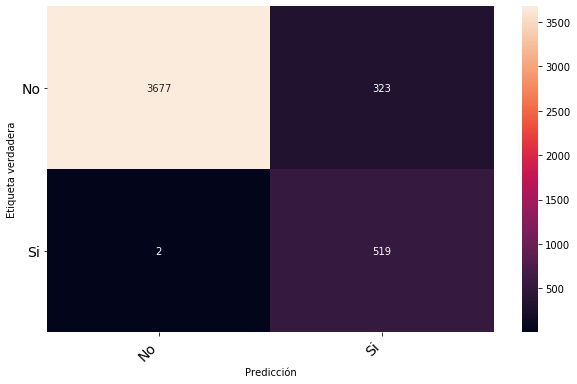

In [0]:
print_confusion_matrix( confusion_matrix=confusion_matrix(y_test,y_pred), class_names=['No','Si'])

In [0]:
152/(152+369)

0.29174664107485604

## 8. Clasificador de Vectores de Soporte
### (SupportVector-Classifier)

In [0]:
Cs = [200  ]   #np.logspace(-2,2,4)  # ~ [0.01, 0.03, 0.1, ..., 100]
gammas = [50 ] #np.logspace(-4,4,4)  # [0.0001, 0.001, ..., 10000]

mejor_modelo = None
mejor_score = 0
for C in Cs:
    for gamma in gammas:
        
        model = SVC(kernel='rbf', C=C, gamma=gamma) 
        model.fit(X_train_n, y_train)
        
        score_val = model.score(X_test_n, y_test) 
        
        if score_val > mejor_score:
            mejor_score = score_val
            mejor_modelo = model


print ('Mejor valor de C: %0.4f' % mejor_modelo.get_params()['C'])
print ('Mejor valor de gamma: %0.4f' % mejor_modelo.get_params()['gamma'])
print ('Exactitud en el conjunto de entrenamiento: %0.4f' % mejor_modelo.score(X_train_n, y_train))
print ('Exactitud en el conjunto de validación: %0.4f' % mejor_modelo.score(X_test_n, y_test))

Mejor valor de C: 200.0000
Mejor valor de gamma: 50.0000
Exactitud en el conjunto de entrenamiento: 1.0000
Exactitud en el conjunto de validación: 1.0000


In [0]:
y_pred = model.predict(X_test_n)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4000
           2       1.00      1.00      1.00       521

    accuracy                           1.00      4521
   macro avg       1.00      1.00      1.00      4521
weighted avg       1.00      1.00      1.00      4521



Figure(720x432)


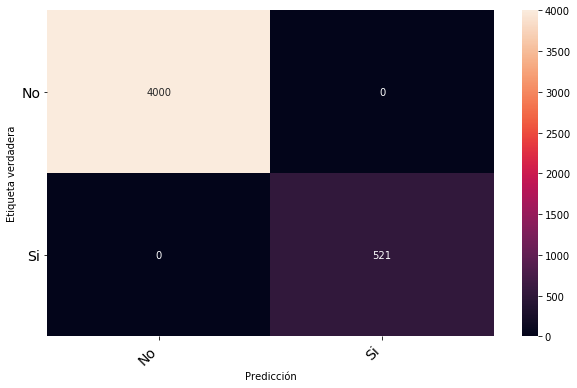

In [0]:
print_confusion_matrix( confusion_matrix=confusion_matrix(y_test,y_pred), class_names=['No','Si'])

## 9. Clasificador bayesiano ingenuo
### (Gaussian Naive Bayes-Classifier)

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_mm = scaler.fit_transform(X_train)
X_test_mm = scaler.transform(X_test)

In [0]:
gnb = GaussianNB( )

In [0]:
model = gnb.fit(X_train_mm , y_train)
print('Precision de GaussianNB en el train: {:.2f}'
     .format(gnb.score(X_train_mm, y_train)))
print('Precision de GaussianNB en el test: {:.2f}'
     .format(gnb.score(X_test_mm, y_test)))

Precision de GaussianNB en el train: 0.75
Precision de GaussianNB en el test: 0.69


In [0]:
y_pred = gnb.predict(X_test_mm)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.67      0.79      4000
           2       0.24      0.80      0.37       521

    accuracy                           0.69      4521
   macro avg       0.60      0.74      0.58      4521
weighted avg       0.88      0.69      0.74      4521



Figure(720x432)


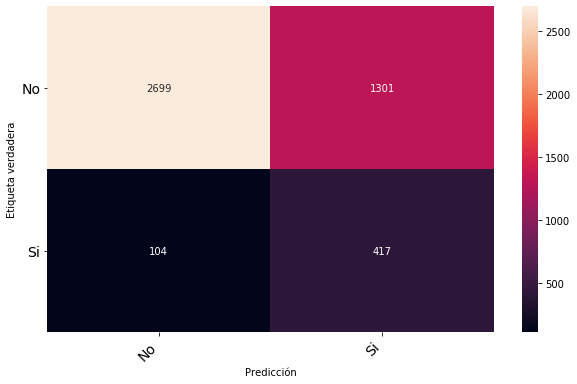

In [0]:
print_confusion_matrix( confusion_matrix=confusion_matrix(y_test,y_pred), class_names=['No','Si'])